# Akshitha Ajayan Jupyter In-Class

## Import Data

In [126]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import random

data, target = load_boston(return_X_y=True)

## Least Sqaures with 5-Fold CV

The average prediction error from 5-fold CV:  58.67289504102067


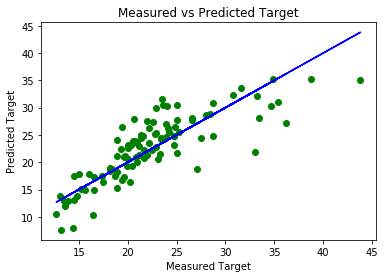

In [158]:
def LS(data, labels):
    w_hat = np.matmul(np.matmul(LA.inv(np.matmul(np.transpose(data), data)), np.transpose(data)), labels)
    return w_hat
    
def LS_error(X, labels, w_hat):
    y_est = np.matmul(X, w_hat)
    error = LA.norm(labels-y_est)
    return y_est, error

X = np.ones((len(data), 14))
for i in range(0, len(data)):
    for j in range(0, 13):
        X[i, j] = data[i, j]
        
test1 = X[0:101, :]
testlab1 = target[0:101]
train1 = X[101:506, :]
label1 = target[101:506]

test2 = X[101:202, :]
testlab2 = target[101:202]
train2 = np.concatenate((X[0:101, :], X[202:506, :]))
label2 = np.concatenate((target[0:101], target[202:506]))

test3 = X[202:303, :]
testlab3 = target[202:303]
train3 = np.concatenate((X[0:202, :], X[303:506, :]))
label3 = np.concatenate((target[0:202], target[303:506]))

test4 = X[303:404, :]
testlab4 = target[303:404]
train4 = np.concatenate((X[0:303, :], X[404:506, :]))
label4 = np.concatenate((target[0:303], target[404:506]))

test5 = X[404:506, :]
testlab5 = target[404:506]
train5 = X[0:404, :]
label5 = target[0:404]

w1 = LS(train1, label1)
y1, err1 = LS_error(test1, testlab1, w1)

w2 = LS(train2, label2)
y2, err2 = LS_error(test2, testlab2, w2)

w3 = LS(train3, label3)
y3, err3 = LS_error(test3, testlab3, w3)

w4 = LS(train4, label4)
y4, err4 = LS_error(test4, testlab4, w4)

w5 = LS(train5, label5)
y5, err5 = LS_error(test5, testlab5, w5)

avg = (err1+err2+err3+err4+err5)/5
print("The average prediction error from 5-fold CV: ", avg)

plt.scatter(testlab1, y1, c='g')
plt.plot(testlab1,testlab1, 'b')
plt.title("Measured vs Predicted Target")
plt.xlabel("Measured Target")
plt.ylabel("Predicted Target")
plt.show()

## Ridge Regression 

In [155]:
def RR(data, labels, lam):
    w_hat = np.matmul(np.matmul(LA.inv(np.matmul(np.transpose(data), data)+lam*np.identity(14)), np.transpose(data)), labels)
    return w_hat
    
def RR_error(X, labels, w_hat):
    y_est = np.matmul(X, w_hat)
    error = LA.norm(labels-y_est)
    return y_est, error

#w_hat = RR(X, target, 1)
#print(w_hat.shape)
#LS_error(X, target, w_hat)
lam = np.linspace(0, 10, num=91)
err1 = np.zeros(91)
err2 = np.zeros(91)
err3 = np.zeros(91)
err4 = np.zeros(91)
err5 = np.zeros(91)
avg = np.zeros(91)

for i in range(0, len(lam)):
    w1 = RR(train1, label1, lam[i])
    y1, err1[i] = RR_error(test1, testlab1, w1)

    w2 = RR(train2, label2, lam[i])
    y2, err2[i] = RR_error(test2, testlab2, w2)

    w3 = RR(train3, label3, lam[i])
    y3, err3[i] = RR_error(test3, testlab3, w3)

    w4 = RR(train4, label4, lam[i])
    y4, err4[i] = RR_error(test4, testlab4, w4)

    w5 = RR(train5, label5, lam[i])
    y5, err5[i] = RR_error(test5, testlab5, w5)
    
    avg[i] = (err1[i]+err2[i]+err3[i]+err4[i]+err5[i])/5

print("The average prediction error from 5-fold CV: ", np.min(avg))
print("From index: ", np.argmin(avg))    
print("Thus, the best lambda value:", lam[np.argmin(avg)])

The average prediction error from 5-fold CV:  54.06690636080937
From index:  89
Thus, the best lambda value: 9.888888888888888
